In [12]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
provider = IBMQ.load_account()


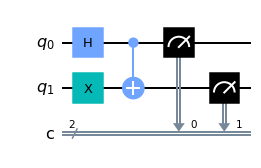

In [13]:
#Making bell's entangled state 00+11
qc_ent=QuantumCircuit(2,2)
qc_ent.h(0)
qc_ent.x(1)
qc_ent.cx(0,1) 
qc_ent.measure(0,0)
qc_ent.measure(1,1)
qc_ent.draw(output='mpl')


In [14]:
#Running first circuit(bell's state) on IBMQ_lima
ent_all=[]

from qiskit import execute
for i in range(1000,11001,2000):
    qcomp=provider.get_backend('ibmq_lima')
    job=execute(qc_ent,backend=qcomp, shots= i)
    job_monitor(job)
    result=job.result()
    count=result.get_counts(qc_ent)
    ent_all.append(count)
ent_all

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


[{'00': 103, '01': 428, '10': 464, '11': 5},
 {'00': 139, '01': 1514, '10': 1328, '11': 19},
 {'00': 198, '01': 2406, '10': 2362, '11': 34},
 {'00': 289, '01': 3359, '10': 3306, '11': 46},
 {'00': 380, '01': 4400, '10': 4170, '11': 50},
 {'00': 414, '01': 5205, '10': 5318, '11': 63}]

In [22]:
ent_00=[]
for i in range(len(ent_all)):
    ent_00.append(ent_all[i]['00'])
ent_11=[]
for i in range(len(ent_all)):
    ent_11.append(ent_all[i]['11'])

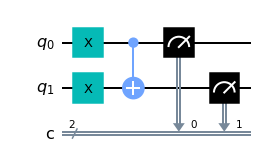

In [15]:
#Making separable state state 00+01
from numpy import pi
sep10=QuantumCircuit(2,2)
sep10.x(0)
sep10.x(1)
sep10.cx(0,1)
sep10.measure(0,0)
sep10.measure(1,1)
sep10.draw(output='mpl')
# Running on qasm_simulator just for a check

In [7]:
job=execute(sep10,backend=Aer.get_backend('qasm_simulator'),shots=1024)
result=job.result()
count=result.get_counts(sep10)
count

{'01': 1024}

In [16]:
sep10_all=[]
for i in range(1000,11001,2000):
    

    qcomp=provider.get_backend('ibmq_lima')
    job=execute(sep10,backend=qcomp,shots=i)
    job_monitor(job)
    result=job.result()
    count=result.get_counts(sep10)
    sep10_all.append(count)
sep10_all

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


[{'00': 144, '01': 844, '10': 6, '11': 6},
 {'00': 129, '01': 2839, '10': 15, '11': 17},
 {'00': 595, '01': 4350, '10': 20, '11': 35},
 {'00': 259, '01': 6647, '10': 34, '11': 60},
 {'00': 362, '01': 8531, '10': 37, '11': 70},
 {'00': 431, '01': 10451, '10': 42, '11': 76}]

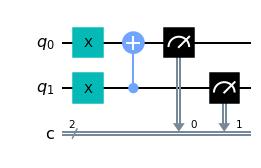

In [17]:
#Making separable state state 00+01
from numpy import pi
sep01=QuantumCircuit(2,2)
sep01.x(0)
sep01.x(1)
sep01.cx(1,0)
sep01.measure(0,0)
sep01.measure(1,1)
sep01.draw(output='mpl')
# Running on qasm_simulator just for a check

In [11]:
job=execute(sep01,backend=Aer.get_backend('qasm_simulator'),shots=1024)
result=job.result()
count=result.get_counts(sep01)
count

{'10': 1024}

In [18]:
sep01_all=[]
for i in range(1000,11001,2000):
    

    qcomp=provider.get_backend('ibmq_lima')
    job=execute(sep01,backend=qcomp,shots=i)
    job_monitor(job)
    result=job.result()
    count=result.get_counts(sep01)
    sep01_all.append(count)
sep01_all

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


[{'00': 32, '01': 7, '10': 953, '11': 8},
 {'00': 114, '01': 9, '10': 2855, '11': 22},
 {'00': 157, '01': 16, '10': 4777, '11': 50},
 {'00': 247, '01': 19, '10': 6669, '11': 65},
 {'00': 316, '01': 38, '10': 8551, '11': 95},
 {'00': 416, '01': 43, '10': 10417, '11': 124}]

In [20]:
sep01_00=[]
for i in range(len(sep01_all)):
    sep01_00.append(sep01_all[i]['00'])
sep01_11=[]
for i in range(len(sep01_all)):
    sep01_11.append(sep01_all[i]['11'])

In [21]:
sep10_00=[]
for i in range(len(sep10_all)):
    sep10_00.append(sep10_all[i]['00'])
sep10_11=[]
for i in range(len(sep10_all)):
    sep10_11.append(sep10_all[i]['11'])

In [23]:
countx=[]
for i in range(1000,11001,2000):
    countx.append(i)

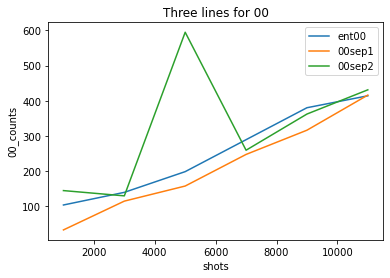

In [26]:
#Plotting curves of error state 01 from all circuits
import matplotlib.pyplot as plt
 
# line 1 points
x1 = countx
y1 = ent_00
# plotting the line 1 points
plt.plot(x1, y1, label = "ent00")
 
# line 2 points
#x2 = countx
#y2 = sep_01
# plotting the line 2 points
#plt.plot(x2, y2, label = "01sep")

# line 3 points
x3 = countx
y3 = sep01_00
# plotting the line 2 points
plt.plot(x3, y3, label = "00sep1")

# line 4 points
x4 = countx
y4 = sep10_00
# plotting the line 2 points
plt.plot(x4, y4, label = "00sep2")
 
# naming the x axis
plt.xlabel('shots')
# naming the y axis
plt.ylabel('00_counts')
# giving a title to my graph
plt.title('Three lines for 00')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()

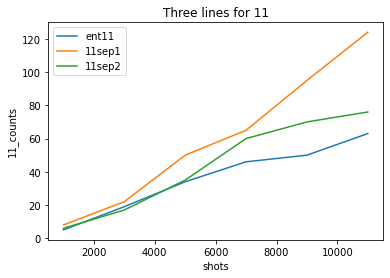

In [27]:
#Plotting curves of error state 01 from all circuits
import matplotlib.pyplot as plt
 
# line 1 points
x1 = countx
y1 = ent_11
# plotting the line 1 points
plt.plot(x1, y1, label = "ent11")
 
# line 2 points
#x2 = countx
#y2 = sep_01
# plotting the line 2 points
#plt.plot(x2, y2, label = "01sep")

# line 3 points
x3 = countx
y3 = sep01_11
# plotting the line 2 points
plt.plot(x3, y3, label = "11sep1")

# line 4 points
x4 = countx
y4 = sep10_11
# plotting the line 2 points
plt.plot(x4, y4, label = "11sep2")
 
# naming the x axis
plt.xlabel('shots')
# naming the y axis
plt.ylabel('11_counts')
# giving a title to my graph
plt.title('Three lines for 11')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()